# Carregando e preparando dados

In [1]:
from datetime import datetime
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytz
import seaborn as sns
import sys
from tqdm import tqdm

sys.path.append("../")
pd.options.display.max_colwidth = 50
sns.set_style("whitegrid")

In [2]:
candidates_file_path = "../data/processed/se_candidates_output_3.csv"
raw_cand_df = pd.read_csv(candidates_file_path, sep=";", encoding="utf-8")

print(raw_cand_df.shape)
raw_cand_df.info()

(1250, 79)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     1250 non-null   object 
 1   HH_GERACAO                     1250 non-null   object 
 2   ANO_ELEICAO                    1250 non-null   int64  
 3   CD_TIPO_ELEICAO                1250 non-null   int64  
 4   NM_TIPO_ELEICAO                1250 non-null   object 
 5   NR_TURNO                       1250 non-null   int64  
 6   CD_ELEICAO                     1250 non-null   int64  
 7   DS_ELEICAO                     1250 non-null   object 
 8   DT_ELEICAO                     1250 non-null   object 
 9   TP_ABRANGENCIA                 1250 non-null   object 
 10  SG_UF                          1250 non-null   object 
 11  SG_UE                          1250 non-null   object 
 12  NM_UE                          1250 n

In [3]:
est_tweets_file_path = (
    "../data/processed/sp_elected_stdep_tweets-ft_hf_classified.csv"
)
est_raw_tweets_df = pd.read_csv(est_tweets_file_path, sep=";", encoding="utf-8")

print(est_raw_tweets_df.shape)
est_raw_tweets_df.info()

(46973, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46973 entries, 0 to 46972
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       46973 non-null  object 
 1   date                      46973 non-null  object 
 2   content                   46973 non-null  object 
 3   user                      46973 non-null  object 
 4   reply_count               46973 non-null  int64  
 5   retweet_count             46973 non-null  int64  
 6   like_count                46973 non-null  int64  
 7   quote_count               46973 non-null  int64  
 8   in_reply_to_id            43445 non-null  float64
 9   in_reply_to_user          43328 non-null  object 
 10  conversation_id           46973 non-null  object 
 11  conversation_user         46973 non-null  object 
 12  ru_bert_base_label        46973 non-null  bool   
 13  ru_bert_base_score        46973 non-null  float64

In [4]:
fed_tweets_file_path = (
    "../data/processed/sp_elected_feddep_tweets-ft_hf_classified.parquet"
)
fed_raw_tweets_df = pd.read_parquet(fed_tweets_file_path)

print(fed_raw_tweets_df.shape)
fed_raw_tweets_df.info()

(78193, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78193 entries, 220 to 215619
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        78193 non-null  object             
 1   date                      78193 non-null  datetime64[ns, UTC]
 2   user                      78193 non-null  object             
 3   content                   78193 non-null  object             
 4   in_reply_to_id            75049 non-null  object             
 5   in_reply_to_user          74540 non-null  object             
 6   conversation_id           78193 non-null  object             
 7   conversation_user         78193 non-null  object             
 8   reply_count               78193 non-null  int64              
 9   retweet_count             78193 non-null  int64              
 10  like_count                78193 non-null  int64              
 11  

In [5]:
# Mantendo cópia dos datasets iniciais
cand_df = raw_cand_df
est_tts_df = est_raw_tweets_df
fed_tts_df = fed_raw_tweets_df

In [6]:
print(sorted(est_tts_df.columns))
print(sorted(fed_tts_df.columns))

['ci_distilbert_base_label', 'ci_distilbert_base_score', 'content', 'conversation_id', 'conversation_user', 'date', 'ft_rc_bert_base_label', 'ft_rc_bert_base_score', 'in_reply_to_id', 'in_reply_to_user', 'label_sum', 'like_count', 'quote_count', 'reply_count', 'retweet_count', 'ru_bert_base_label', 'ru_bert_base_score', 'ru_bert_large_label', 'ru_bert_large_score', 'ru_mdeberta_base_label', 'ru_mdeberta_base_score', 'url', 'user']
['cl_distilbert_base_label', 'cl_distilbert_base_score', 'content', 'conversation_id', 'conversation_user', 'date', 'ft_rc_bert_base_label', 'ft_rc_bert_base_score', 'id', 'in_reply_to_id', 'in_reply_to_user', 'label_sum', 'like_count', 'quote_count', 'rc_bert_base_label', 'rc_bert_base_score', 'rc_mdeberta_base_label', 'rc_mdeberta_base_score', 'reply_count', 'retweet_count', 'user', 'view_count']


## Dataset de Candidatos

In [7]:
# Removendo colunas não utilizadas
cand_cols = [
    "SG_UF",
    "DS_CARGO",
    "SQ_CANDIDATO",
    "NM_URNA_CANDIDATO",
    "NR_PARTIDO",
    "SG_PARTIDO",
    "NM_MUNICIPIO_NASCIMENTO",
    "NR_IDADE_DATA_POSSE",
    "DS_GENERO",
    "DS_GRAU_INSTRUCAO",
    "DS_ESTADO_CIVIL",
    "DS_COR_RACA",
    "DS_OCUPACAO",
    "DS_SIT_TOT_TURNO",
    "ST_REELEICAO",
    "TW_USER",
    "TW_followersCount",
    "TW_friendsCount",
    "TW_statusesCount",
    "TW_favouritesCount",
]
cand_df = cand_df[cand_cols]
print(cand_df.shape)

(1250, 20)


In [8]:
# Filtrando somente os deputados estaduais de SP
cand_df = cand_df[cand_df["SG_UF"] == "SP"]
cand_df = cand_df[(cand_df["DS_CARGO"] == "DEPUTADO ESTADUAL") | (cand_df["DS_CARGO"] == "DEPUTADO FEDERAL")]
cand_df.shape

(595, 20)

In [9]:
# Convertendo usernames para minusculo
cand_df["TW_USER"] = cand_df["TW_USER"].str.lower()

## Dataset de Tweets

In [13]:
est_tts_df.url[0].split('/')[-1]

'1575873686019579905'

In [16]:
def extract_id_from_url(url):
    return url.split('/')[-1]

def convert_url_to_tweet_id(df):
    if 'url' not in df.columns:
        return df
    df['id'] = df['url'].apply(extract_id_from_url)
    return df

if not 'id' in est_tts_df:
    convert_url_to_tweet_id(est_tts_df)

if not 'id' in fed_tts_df:
    convert_url_to_tweet_id(fed_tts_df)

In [18]:
# Removendo colunas não utilizadas. Vamos usar somente a classificação do modelo refinado.
tweet_cols = [
    "id",
    "date",
    "content",
    "user",
    "in_reply_to_user",
    "conversation_user",
    "ft_rc_bert_base_label",
    "ft_rc_bert_base_score",
]
est_tts_df = est_tts_df[tweet_cols]
fed_tts_df = fed_tts_df[tweet_cols]
print(est_tts_df.shape, fed_tts_df.shape)

(46973, 8) (78193, 8)


In [21]:
tts_df = pd.concat([est_tts_df, fed_tts_df])
tts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125166 entries, 0 to 215619
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     125166 non-null  object 
 1   date                   125166 non-null  object 
 2   content                125166 non-null  object 
 3   user                   125166 non-null  object 
 4   in_reply_to_user       117868 non-null  object 
 5   conversation_user      125166 non-null  object 
 6   ft_rc_bert_base_label  125166 non-null  bool   
 7   ft_rc_bert_base_score  125166 non-null  float64
dtypes: bool(1), float64(1), object(6)
memory usage: 7.8+ MB


In [24]:
tts_df.rename(columns={
    "ft_rc_bert_base_label": "class_label", 
    "ft_rc_bert_base_score": "class_score"
}, inplace=True)

In [25]:
# Convertendo a coluna de data para o tipo correto
tts_df.date = pd.to_datetime(tts_df.date)
tts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125166 entries, 0 to 215619
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   id                 125166 non-null  object             
 1   date               125166 non-null  datetime64[ns, UTC]
 2   content            125166 non-null  object             
 3   user               125166 non-null  object             
 4   in_reply_to_user   117868 non-null  object             
 5   conversation_user  125166 non-null  object             
 6   class_label        125166 non-null  bool               
 7   class_score        125166 non-null  float64            
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 7.8+ MB


In [27]:
# Filtrando somente os tweets do período desejado
local_tz = pytz.timezone("America/Sao_Paulo")
since = datetime(year=2022, month=9, day=1, tzinfo=local_tz)
until = datetime(year=2022, month=11, day=1, tzinfo=local_tz)

tts_df = tts_df[(tts_df["date"] >= since) & (tts_df["date"] <= until)]
tts_df.shape

(125166, 8)

In [29]:
# Removendo tweets com informação faltando de reply
# Se 'user' é diferente de 'conversation_user', então o tweet deveria ter também 'in_reply_to_user'
# Se não tiver, é por que houve algum erro durante o scraping, ou com o tweet respondido
tts_df = tts_df[
    ~(
        (tts_df["in_reply_to_user"].isnull())
        & (tts_df["user"] != tts_df["conversation_user"])
    )
]
tts_df.shape

(125112, 8)

In [30]:
# Convertendo usernames para minusculo
tts_df.user = tts_df.user.str.lower()
tts_df.conversation_user = tts_df.conversation_user.str.lower()
tts_df.in_reply_to_user = tts_df.in_reply_to_user.str.lower()

## Juntando os datasets

In [34]:
df = pd.merge(
    tts_df, cand_df, left_on="conversation_user", right_on="TW_USER", how="left"
)
print(df.shape)
df.info()

(125112, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125112 entries, 0 to 125111
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   id                       125112 non-null  object             
 1   date                     125112 non-null  datetime64[ns, UTC]
 2   content                  125112 non-null  object             
 3   user                     125112 non-null  object             
 4   in_reply_to_user         117868 non-null  object             
 5   conversation_user        125112 non-null  object             
 6   class_label              125112 non-null  bool               
 7   class_score              125112 non-null  float64            
 8   SG_UF                    125112 non-null  object             
 9   DS_CARGO                 125112 non-null  object             
 10  SQ_CANDIDATO             125112 non-null  int64              
 11  

In [36]:
# Adicionando coluna para indicar se o usuário do tweet é um candidato
deputies_usernames = list(df.TW_USER.str.lower().unique())
df["user_is_candidate"] = df["user"].apply(lambda u: u in deputies_usernames)

False    0.926218
True     0.073782
Name: user_is_candidate, dtype: float64

# EDA

## Exploração inicial dos dados

[Text(0.5, 1.0, 'Histograma de caracteres por tweet')]

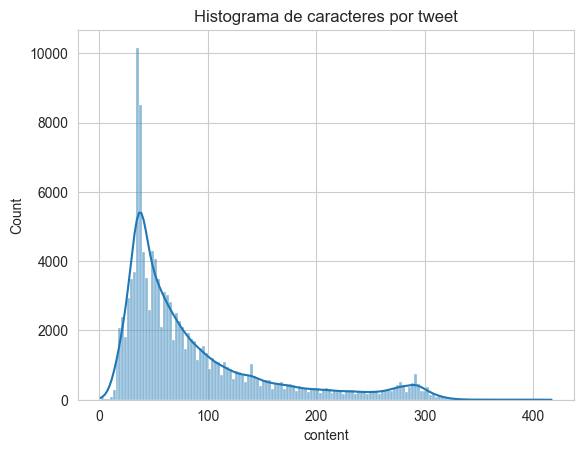

In [60]:
# Checando a distribuição do tamanho dos tweets
sns.histplot(
    df.content.str.len(),
    kde=True,
).set(title="Histograma de caracteres por tweet")

False    0.926218
True     0.073782
Name: user_is_candidate, dtype: float64


[Text(0.5, 1.0, 'Proporção de tweets por candidato')]

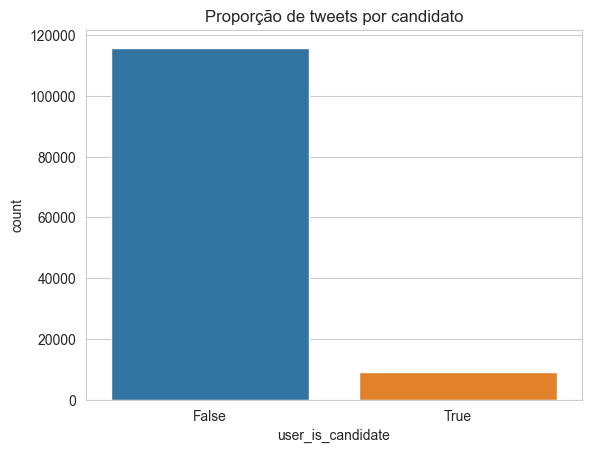

In [61]:
# Avaliando a proporção de tweets entre candidatos e não-candidatos
print(df["user_is_candidate"].value_counts(normalize=True))

sns.countplot(
    df,
    x="user_is_candidate", 
    # ax=ax[1]
).set(title="Proporção de tweets por candidato")

In [62]:
# Avaliando a distribuição dos tweets entre os candidatos
print(f"df['conversation_user'] mais comuns: \n{(df['conversation_user'].value_counts(normalize=True)[:5])}\n")
print(f"df['user'] mais comuns: \n{(df['user'].value_counts(normalize=True)[:5])}\n")

df['conversation_user'] mais comuns: 
samiabomfim      0.315094
carteiroreaca    0.155077
rsallesmma       0.123170
andreawerner_    0.094819
luizaerundina    0.067220
Name: conversation_user, dtype: float64

df['user'] mais comuns: 
andreawerner_      0.009320
samiabomfim        0.006650
rosangelamorosp    0.005315
carteiroreaca      0.004916
carlosgiannazi     0.004108
Name: user, dtype: float64



~60% dos tweets analisados foram postados em threads de apenas 3 candidatos, indicando um alto desbalanceamento entre os tweets dos deputados.
Porém quando avaliamos os usuários que mais postaram, os 3 usuários mais ativos representam apenas ~3% dos tweets.

False    0.831951
True     0.168049
Name: class_label, dtype: float64 



[Text(0.5, 1.0, 'Histograma de score das classificações')]

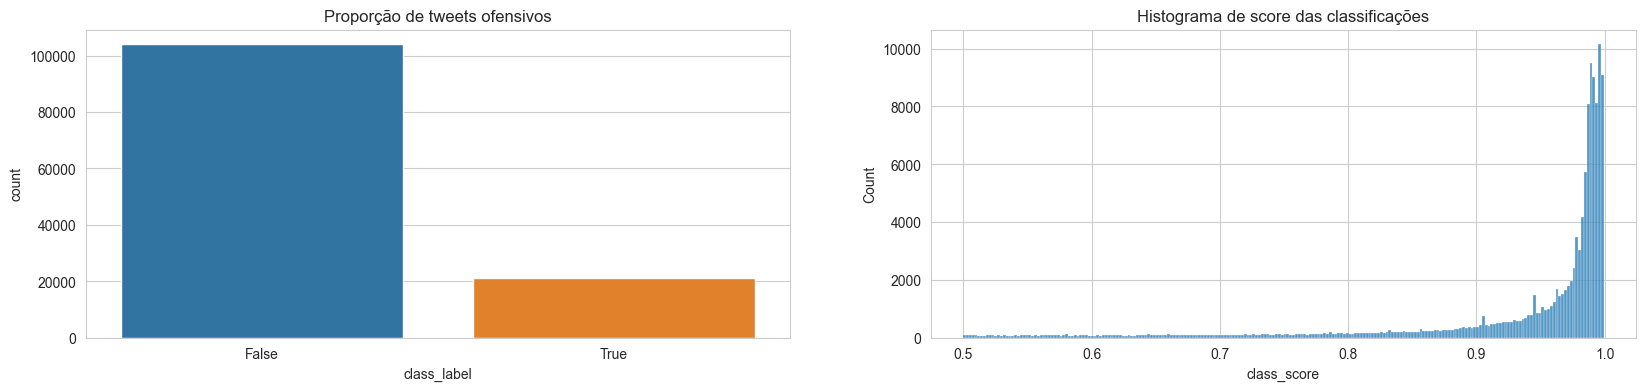

In [64]:
# Avaliando a distribuição e score de ofensas no dataset
print(df['class_label'].value_counts(normalize=True), '\n')

fig, ax = plt.subplots(1, 2, figsize=(20, 4))
sns.countplot(
    df,
    x="class_label", 
    ax=ax[0],
).set(title="Proporção de tweets ofensivos")
sns.histplot(
    df.class_score,
    ax=ax[1],
).set(title="Histograma de score das classificações")

Aproximadamente 17% dos tweets analisados receberam a flag de conteúdo ofensivo

In [71]:
# Checando tweets com conteúdo igual, que acontece principalmente em dois cenários:
# - Vários usuários postando exatamente a mesma mensagem para um candidato
# - Um usuário postando exatamente a mesma mensagem para vários candidatos diferentes
repeated_tweets = (df.content.value_counts() > 1).loc[lambda x: x == True].index
repeated_tweets = df[df['content'].isin(repeated_tweets)]
indexes = repeated_tweets.content.sort_values().index
repeated_tweets = repeated_tweets.reindex(indexes)

print(f'Tweets de conteúdo repetido: {repeated_tweets.shape[0]}')
print(f'Proporção de tweets repetidos: {repeated_tweets.shape[0] / df.shape[0]}')

print(f'\nProporção de conteúdo ofensivo nos tweets repetidos: \n{repeated_tweets["class_label"].value_counts(normalize=True)}')

Tweets de conteúdo repetido: 7162
Proporção de tweets repetidos: 0.05724470874096809

Proporção de conteúdo ofensivo nos tweets repetidos: 
False    0.826864
True     0.173136
Name: class_label, dtype: float64


A proporção de tweets com conteúdo repetido e ofensivo é semelhante à encontrada no total de tweets

## Calculando e analisando métricas

**Glossário**
- **tweet**: qualquer postagem feita no Twitter
- **reply**: tweets feitos em resposta direta a outro *tweet*
- **thread** (conversa): uma sequencia de *tweets*, composta pelo *tweet* inicial, *replies* feitas a esse *tweet*, *replies* feitas a essas *replies*, e assim sucessivamente

### Funções auxiliares
Vamos começar definindo algumas funções para padronizar e facilitar a nossa análise

In [197]:
figsize = (20, 4)
percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]
base_cols = ['TW_USER']

def side_by_side(*dfs):
    """Exibe dataframes lado a lado"""
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

def print_quant_data(df, cols, sort_by):
    """Exibe lado a lado as descrições estatísticas das colunas, e os 10 maiores valores de coluna passada"""
    side_by_side(
        df[cols].describe(percentiles=percentiles),
        df[base_cols + cols].sort_values(sort_by, ascending=False).head(10)
    )

def plot_histograms(df, cols, figsize=figsize):
    """Plota histogramas das colunas passadas lado a lado"""
    fig, ax = plt.subplots(1, len(cols), figsize=figsize)
    
    for i, col in enumerate(cols):
        sns.histplot(
            df,
            x=col,
            kde=True,
            ax=ax[i],
        ).set(title=f'Histograma de {col}')  

def plot_boxplots(df, cols, figsize=figsize, title='Métricas'):
    """Plota boxplots das colunas passadas um acima do outro"""
    plt.figure(figsize=figsize)
    sns.boxplot(
        data=df[cols],
        orient='h',
    ).set(title=title)
    
def plot_cols(df, cols, figsize=figsize, title='Métricas'):
    """Plota histogramas e boxplots das colunas passadas"""
    plot_histograms(df, cols, figsize)
    plt.show()
    plot_boxplots(df, cols, figsize, title)


def plot_corr_heatmap(df, figsize=(12, 4)):
    plt.figure(figsize=figsize)
    sns.heatmap(
        df.corr(),
        annot=True, fmt='.2f',
        cmap='PRGn', vmin=-1, vmax=1,
        mask=np.triu(np.ones_like(df.corr()))
    )
    

### Métricas de atividade e engajamento

In [74]:
def get_tweets(user):
    """Total de tweets postados pelo usuário"""
    _df = df[df['user'] == user]
    return _df.shape[0]

def get_threads(user):
    """Total de threads criadas pelo usuário"""
    _df = df[df['user'] == user]
    threads = _df[_df['in_reply_to_user'].isna()]
    return threads.shape[0]

def get_replies(user):
    """Total de replies recebidas pelo usuário"""
    _df = df[df['in_reply_to_user'] == user]
    return _df.shape[0]

def get_thread_tts(user):
    """Total de tweets postados em threads do usuário (incluindo os próprios tweets do usuario)"""
    _df = df[df['conversation_user'] == user]
    return _df.shape[0]

cand_df['TW_tweets'] = cand_df['TW_USER'].apply(get_tweets)
cand_df['TW_threads'] = cand_df['TW_USER'].apply(get_threads)
cand_df['TW_replies'] = cand_df['TW_USER'].apply(get_replies)
cand_df['TW_thread_tts'] = cand_df['TW_USER'].apply(get_thread_tts)

direct_activity_cols = ['TW_tweets', 'TW_threads', 'TW_replies', 'TW_thread_tts',]

side_by_side(
    cand_df[direct_activity_cols].describe(percentiles=percentiles),
    cand_df[['TW_USER'] + direct_activity_cols].sort_values('TW_thread_tts', ascending=False).head(10)
)

,TW_tweets,TW_threads,TW_replies,TW_thread_tts
count,595.000000,595.000000,595.000000,595.000000
mean,15.781513,12.174790,196.168067,210.272269
std,84.389345,62.100898,1991.229068,2045.490857
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
95%,77.900000,73.100000,17.200000,116.000000
max,1166.000000,660.000000,38630.000000,39422.000000


In [80]:
# Muitos candidatos não fizeram nenhuma postagem, portanto vamos remove-los e avaliar os números novamente
cand_df = cand_df[cand_df['TW_threads'] > 0]
print(cand_df.shape)

(47, 27)


,TW_tweets,TW_threads,TW_replies,TW_thread_tts
count,47.000000,47.000000,47.000000,47.000000
mean,196.404255,154.127660,2482.617021,2661.957447
std,236.108731,165.665144,6737.989861,6881.892235
min,1.000000,1.000000,0.000000,1.000000
5%,5.300000,4.600000,0.300000,7.900000
25%,39.000000,30.000000,4.000000,91.000000
50%,125.000000,102.000000,44.000000,154.000000
75%,243.500000,197.500000,525.500000,791.500000
95%,650.000000,519.000000,13880.200000,14345.900000
max,1166.000000,660.000000,38630.000000,39422.000000


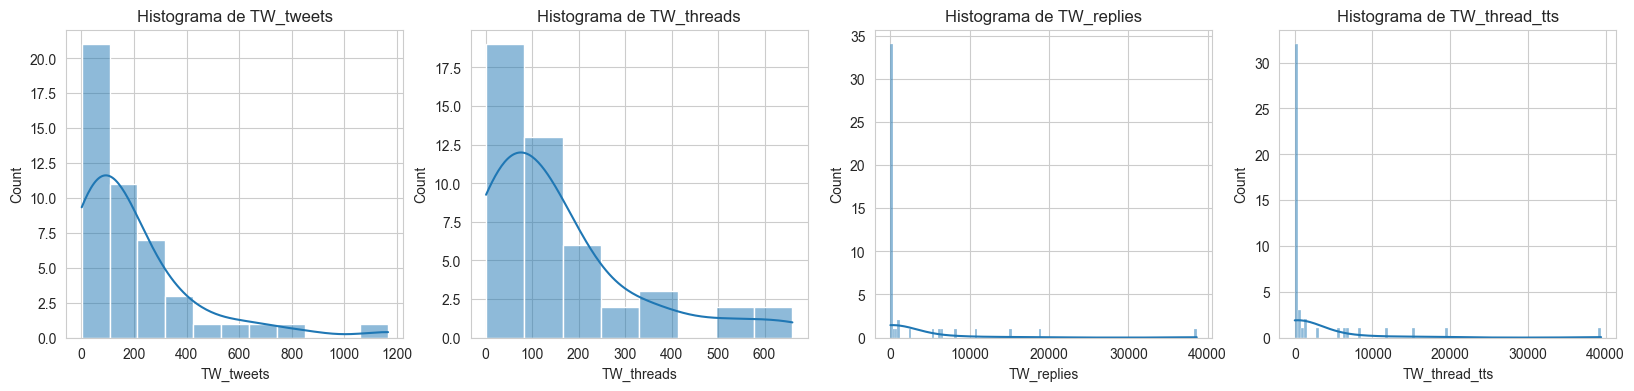

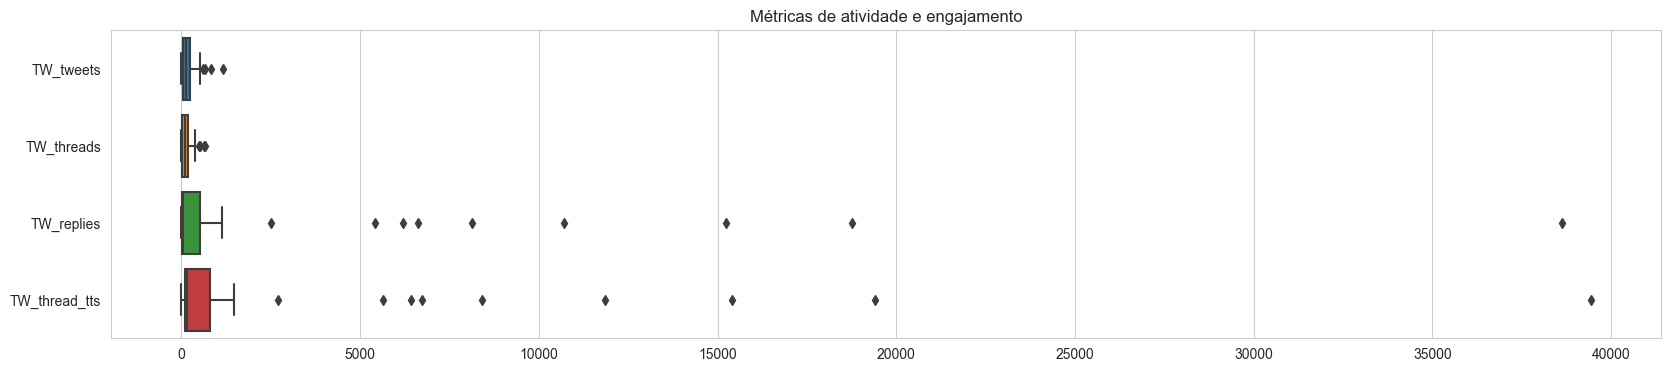

In [118]:
print_quant_data(cand_df, direct_activity_cols, 'TW_thread_tts')
plot_cols(cand_df, direct_activity_cols, title=f'Métricas de atividade e engajamento')

Podemos perceber alguns outliers nas quatro métricas, mas as diferenças são bem mais acentuadas em `TW_replies` e `TW_thread_tts`. Isso nos mostra que o engajamento recebido pelos usuarios pode ser bastante desigual e irregular, e é provável que isso impacte nas métricas de conteúdo ofensivo.

Além disso, a coluna `TW_replies` tem valores muito próximos de `TW_thread_tts`, indicando que as threads sejam pouco profundas (ou seja, possuem poucos níveis de replies) e que a grande maioria dos tweets são respostas diretas à quem iniciou as threads.

Vamos analisar melhor a composição das threads para confirmar estas suposições:

### Métricas de composição das threads

In [79]:
def get_user_thread_tts(user):
    """Total de tweets postados pelo usuário em suas threads"""
    _df = df[
        (df['conversation_user'] == user) & 
        (df['user'] == user)
    ]
    return _df.shape[0]

def get_reply_thread_tts(user):
    """Total de replies ao usuário, em threads do usuário"""
    _df = df[
        (df['conversation_user'] == user) & 
        (df['in_reply_to_user'] == user) & 
        (df['user'] != user)
    ]
    return _df.shape[0]
    
def get_non_reply_thread_tts(user):
    """Total de tweets postados em threads do usuário, mas que não envolvem o usuário diretamente"""
    _df = df[
        (df['conversation_user'] == user) & 
        (df['in_reply_to_user'] != user) & 
        (df['user'] != user)
    ]
    return _df.shape[0]

cand_df['TW_user_thread_tts'] = cand_df['TW_USER'].apply(get_user_thread_tts)
cand_df['TW_reply_thread_tts'] = cand_df['TW_USER'].apply(get_reply_thread_tts)
cand_df['TW_non_reply_thread_tts'] = cand_df['TW_USER'].apply(get_non_reply_thread_tts)

thread_comp_cols = ['TW_user_thread_tts', 'TW_reply_thread_tts', 'TW_non_reply_thread_tts']

,TW_user_thread_tts,TW_reply_thread_tts,TW_non_reply_thread_tts
count,47.000000,47.000000,47.000000
mean,195.510638,2462.106383,4.340426
std,235.131404,6732.128558,11.986000
min,1.000000,0.000000,0.000000
5%,5.300000,0.000000,0.000000
25%,39.000000,1.000000,0.000000
50%,125.000000,25.000000,0.000000
75%,243.500000,483.000000,0.500000
95%,649.700000,13864.500000,33.700000
max,1163.000000,38567.000000,59.000000


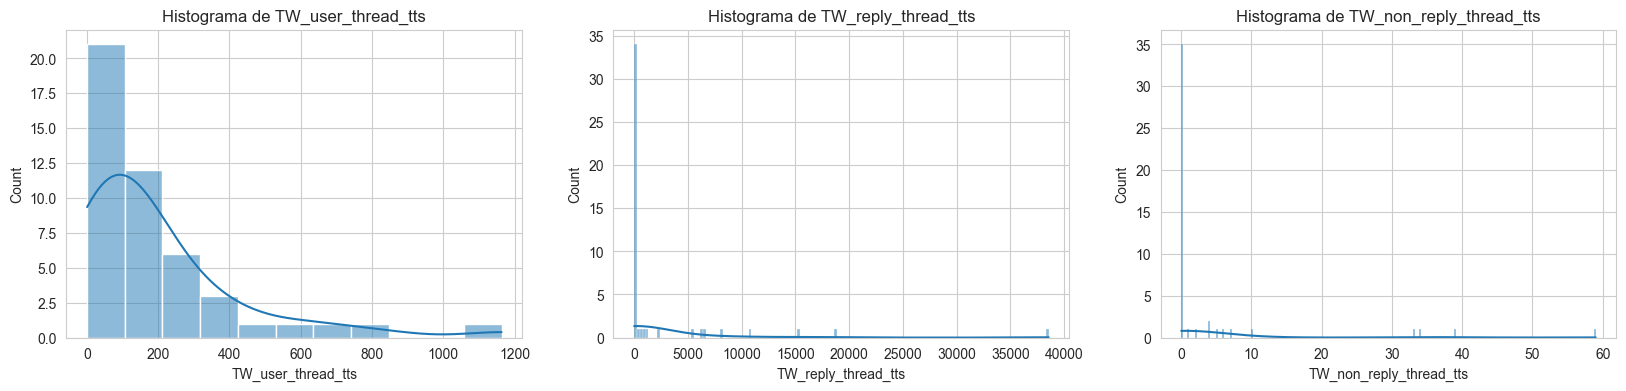

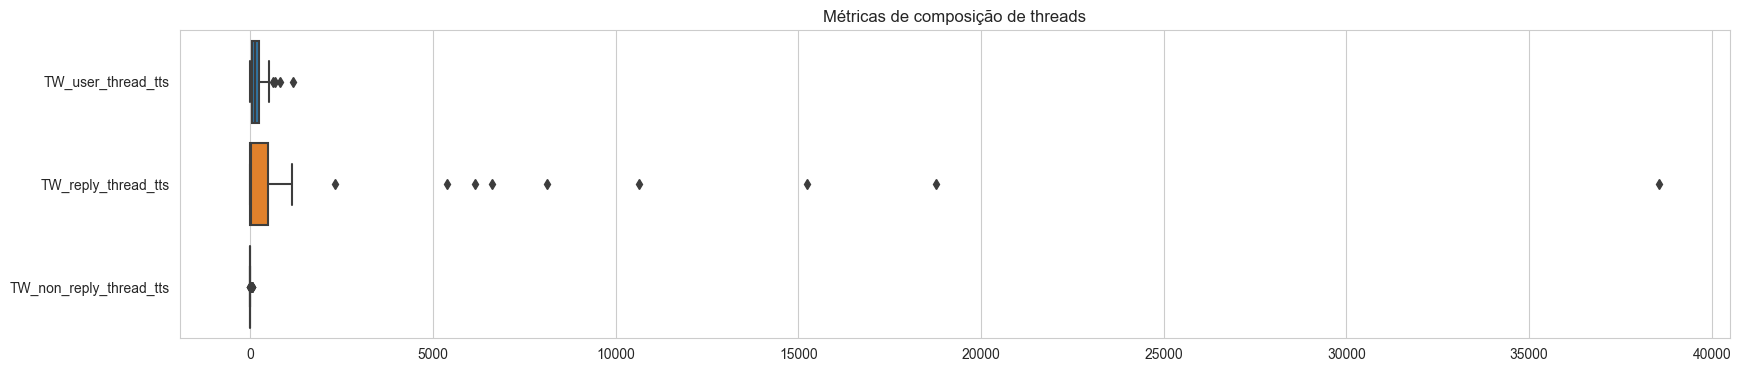

In [92]:
print_quant_data(cand_df, thread_comp_cols, 'TW_non_reply_thread_tts')
plot_cols(cand_df, thread_comp_cols, title=f'Métricas de composição de threads')

In [82]:
# Vamos checar a proporção de tipo de tweet em nosso dataset
means_sum = sum(cand_df[thread_comp_cols].mean())
cand_df[thread_comp_cols].mean() / means_sum

TW_user_thread_tts         0.073446
TW_reply_thread_tts        0.924923
TW_non_reply_thread_tts    0.001631
dtype: float64

Estes números confirmam que a grande maioria dos tweets são respostas diretas aos criadores das threads, e portanto podemos ignorar os tweets que não envolvem os criadores de threads: 
- **~7%:** tweets dos criadores das threads
- **~92%:** replies diretas aos criadores das threads
- **~0.01%:** replies que não envolvem os criadores das threads

Antes de seguir com as análises de conteúdo ofensivo, vamos calcular também algumas taxas relacionadas ao engajamento

### Métricas proporcionais de engajamento

In [84]:
"""
Média de tweets do usuario por threads do usuário. 
Indica o quanto o usuario interage com outros tweets dentro de suas threads
"""
cand_df['TW_avg_thread_user_tts'] = cand_df['TW_tweets'] / cand_df['TW_threads']

"""
Média de tweets do usuario pelo total de tweets em suas threads. 
Indica o quanto do engajamento das threads vem do próprio usuário
"""
cand_df['TW_avg_thread_part'] = cand_df['TW_tweets'] / cand_df['TW_thread_tts']

"""
Média de replies que o usuário recebe para cada tweet postado.
Indica se o usuário recebe um alto engajamento direto
"""
cand_df['TW_avg_replies'] = cand_df['TW_replies'] / cand_df['TW_tweets']

"""
Média do total de tweets por thread do usuário.
Indica o engajamento geral nas threads do usuário
"""
cand_df['TW_avg_thread_tts'] = cand_df['TW_thread_tts'] / cand_df['TW_threads']

prop_activity_cols = ['TW_avg_thread_user_tts', 'TW_avg_thread_part', 'TW_avg_replies', 'TW_avg_thread_tts']

,TW_avg_thread_user_tts,TW_avg_thread_part,TW_avg_replies,TW_avg_thread_tts
count,47.000000,47.000000,47.000000,47.000000
mean,1.236015,0.607527,8.311138,11.346723
std,0.381123,0.372354,21.550712,25.807641
min,1.000000,0.008112,0.000000,1.000000
5%,1.000000,0.024283,0.001389,1.001395
25%,1.005338,0.309286,0.080128,1.083916
50%,1.139442,0.628319,0.666667,1.786667
75%,1.248762,0.990789,2.543885,4.395238
95%,1.887121,1.000000,41.655836,53.337153
max,3.039062,1.007937,121.976000,151.078431


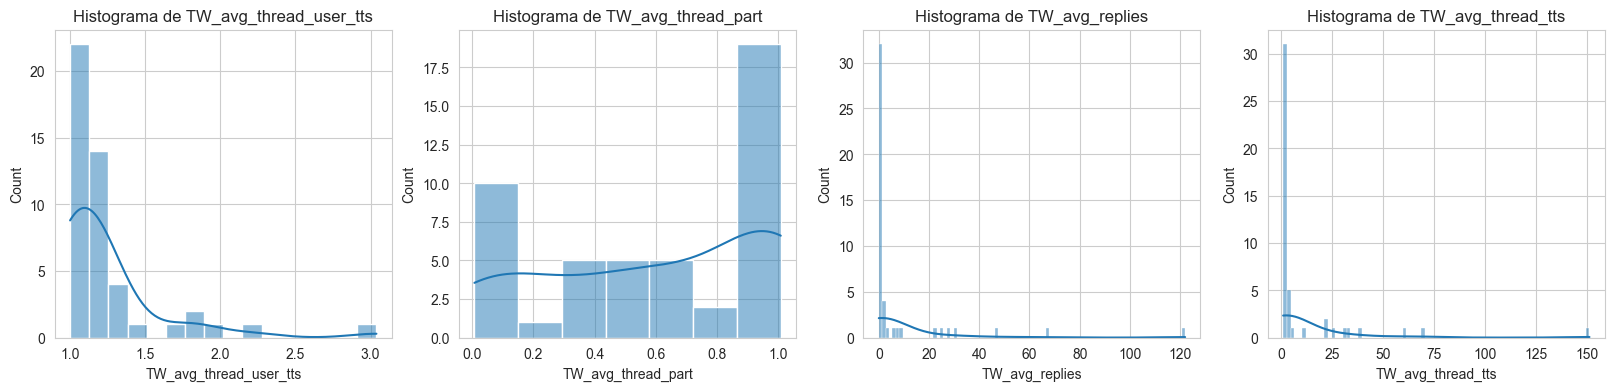

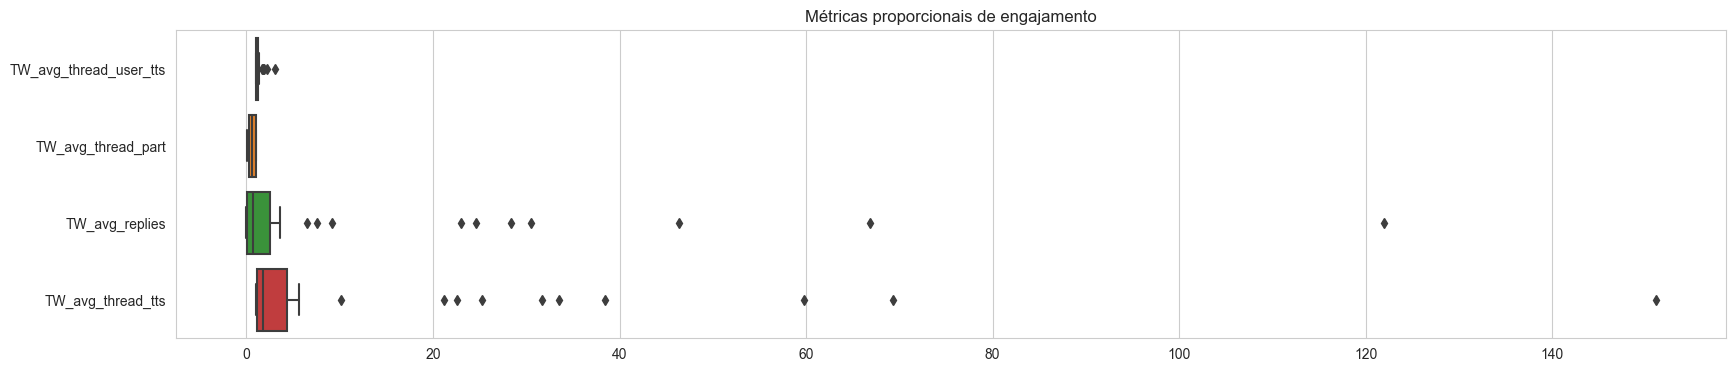

In [95]:
print_quant_data(cand_df, prop_activity_cols, 'TW_avg_thread_tts')
plot_cols(cand_df, prop_activity_cols, title=f'Métricas proporcionais de engajamento')

Avaliando tanto `TW_avg_thread_user_tts`, podemos concluir que os usuários analisados não participam muito das discussões em suas threads

... 

INCOMPLETO

### Correlação entre as Métricas de Engajamento 

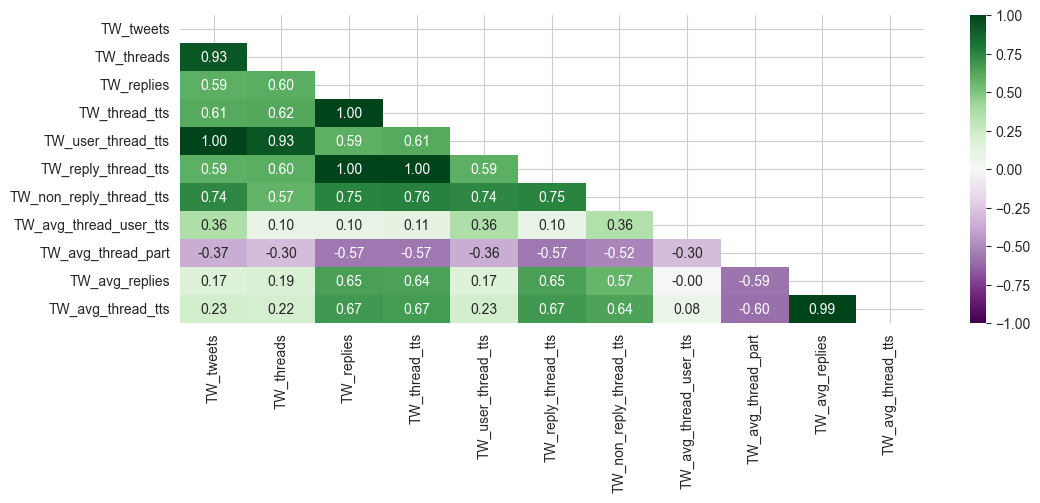

In [201]:
_df = cand_df[direct_activity_cols + thread_comp_cols + prop_activity_cols]
plot_corr_heatmap(_df)

... 

INCOMPLETO

### Métricas de conteúdo ofensivo

In [104]:
def get_user_offenses(user):
    """Quantidade de tweets ofensivos postados pelo usuário"""
    user_df = df[df['conversation_user'] == user]
    offenses = user_df[
        (user_df['class_label'] == True) &
        (user_df['user'] == user)
    ]
    return offenses.shape[0]

def get_reply_offenses(user):
    """Quantidade de replies ofensivas recebidas pelo usuário"""
    user_df = df[df['conversation_user'] == user]
    offenses = user_df[
        (user_df['class_label'] == True) &
        (user_df['in_reply_to_user'] == user)
    ]
    return offenses.shape[0]

def get_conversation_offenses(user):
    """Quantidade de tweets ofensivos postados em threads do usuário"""
    user_df = df[df['conversation_user'] == user]
    offenses = user_df[user_df['class_label'] == True]
    return offenses.shape[0]

cand_df['TW_user_offs'] = cand_df['TW_USER'].apply(get_user_offenses)
cand_df['TW_reply_offs'] = cand_df['TW_USER'].apply(get_reply_offenses)
cand_df['TW_thread_offs'] = cand_df['TW_USER'].apply(get_conversation_offenses)

offense_count_cols = ['TW_user_offs', 'TW_reply_offs', 'TW_thread_offs']

,TW_user_offs,TW_reply_offs,TW_thread_offs
count,47.000000,47.000000,47.000000
mean,15.404255,432.085106,447.340426
std,26.199618,1288.334682,1308.642364
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.500000
50%,5.000000,2.000000,10.000000
75%,15.500000,67.500000,94.000000
95%,75.100000,2006.800000,2031.300000
max,130.000000,7785.000000,7912.000000


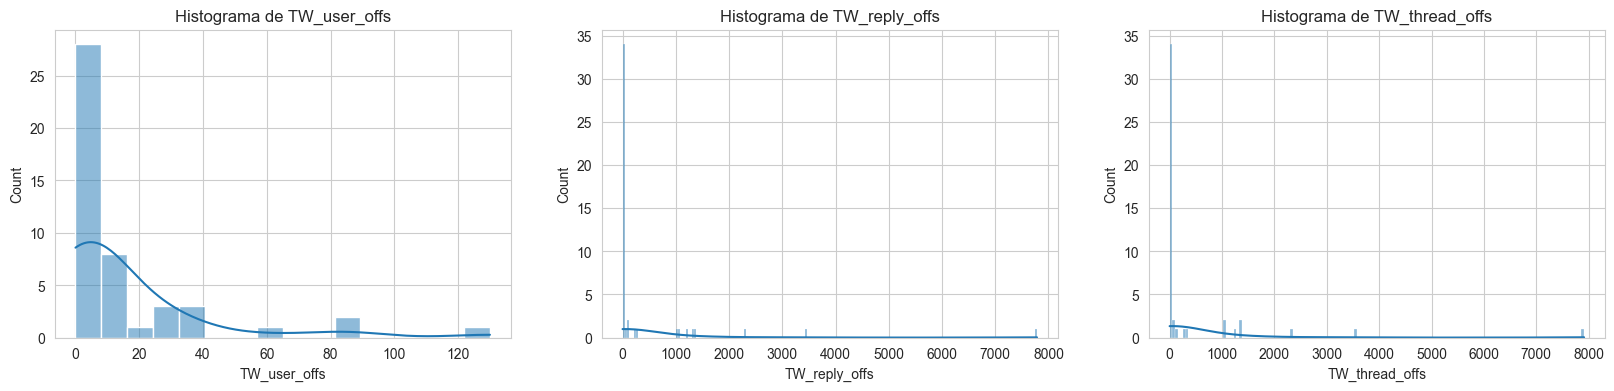

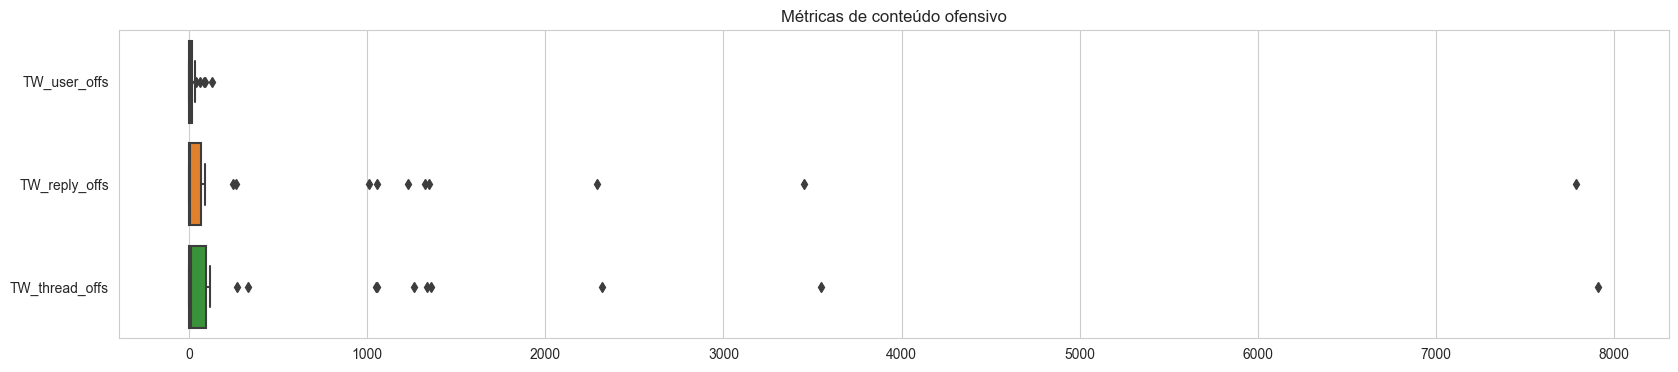

In [105]:
print_quant_data(cand_df, offense_count_cols, 'TW_thread_offs')
plot_cols(cand_df, offense_count_cols, title=f'Métricas de conteúdo ofensivo')

Ao analisar a quantidade de conteudo ofensivo encontramos outliers de forma semelhante aos da análise anterior, o que pode apontar uma forte (e já esperada) correlação entre quantidade de tweets e de conteúdo ofensivo.

Vamos agora avaliar esta proporção.

In [109]:
"""Taxa de tweets ofensivos por thread do usuário"""
cand_df['TW_offs_per_thread'] = cand_df['TW_thread_offs'] / cand_df['TW_threads']

"""Taxa de tweets ofensivos pelo total de tweets postados pelo usuário"""
cand_df['TW_user_offs_rate'] = cand_df['TW_user_offs'] / cand_df['TW_tweets']

"""Taxa de replies ofensivas pelo total de replies recebidas pelo usuário"""
cand_df['TW_reply_offs_rate'] = cand_df['TW_reply_offs'] / cand_df['TW_replies']

"""Taxa de tweets ofensivos pelo total de tweets em threads do usuário"""
cand_df['TW_thread_offs_rate'] = cand_df['TW_thread_offs'] / cand_df['TW_thread_tts']

offense_prop_cols = ['TW_offs_per_thread', 'TW_user_offs_rate', 'TW_reply_offs_rate', 'TW_thread_offs_rate']

,TW_offs_per_thread,TW_user_offs_rate,TW_reply_offs_rate,TW_thread_offs_rate
count,47.000000,47.000000,44.000000,47.000000
mean,1.760102,0.065524,0.137808,0.088824
std,4.324779,0.068869,0.209042,0.067168
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
25%,0.051667,0.000000,0.010714,0.036722
50%,0.120968,0.033448,0.099575,0.071429
75%,0.513200,0.124845,0.167446,0.142857
95%,10.497456,0.173200,0.320833,0.201792
max,22.735294,0.257862,1.000000,0.227053


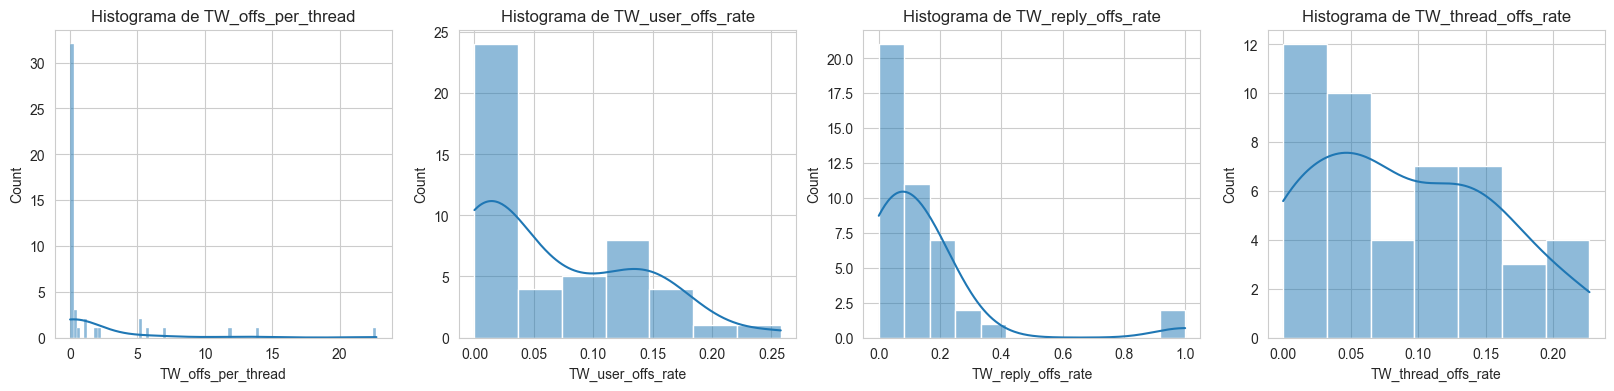

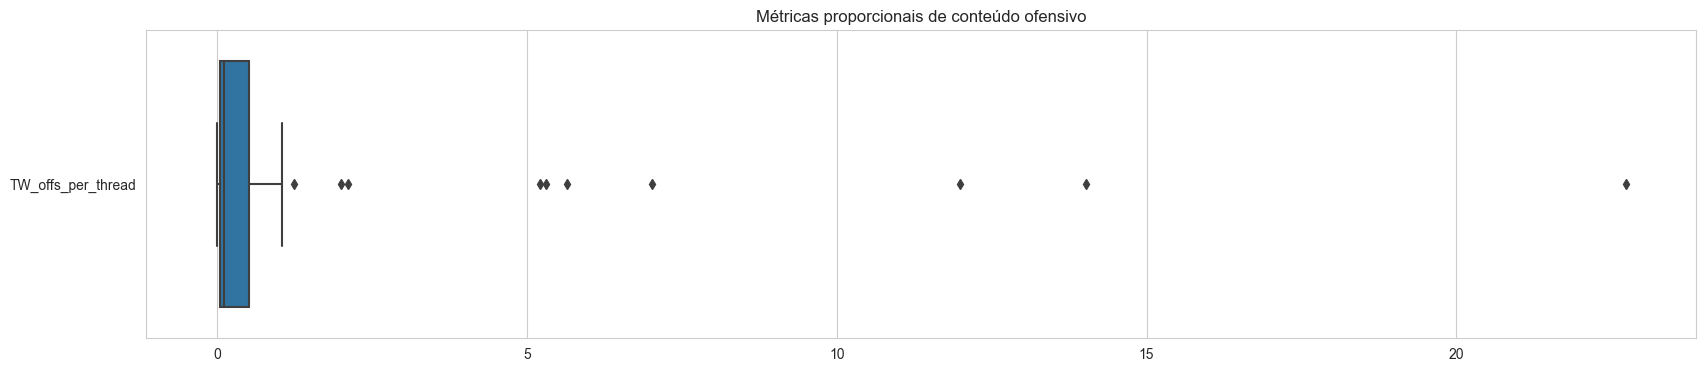

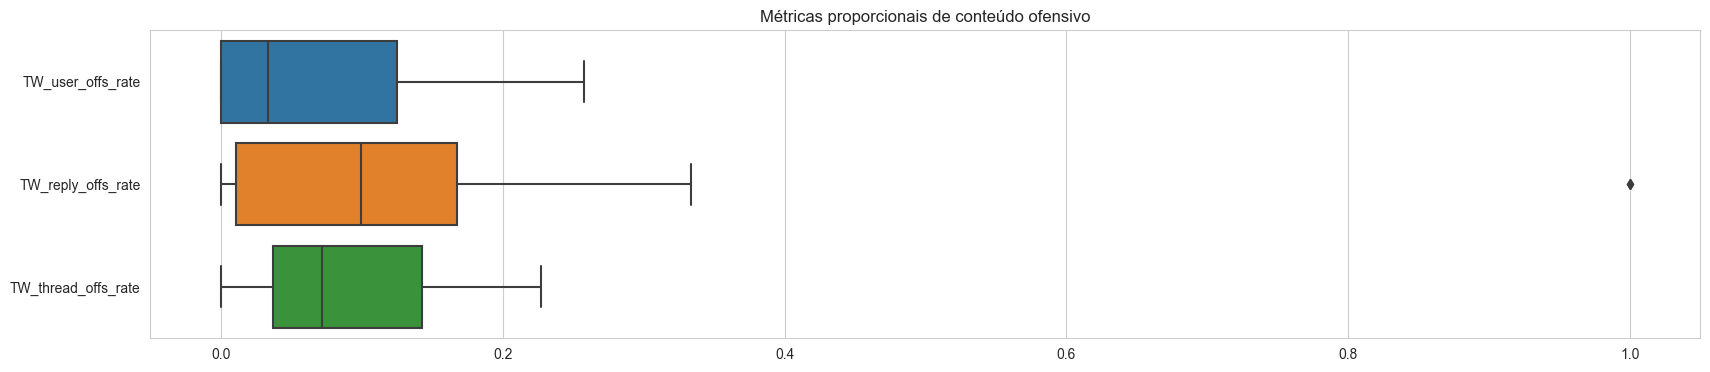

In [131]:
print_quant_data(
    cand_df, 
    offense_prop_cols, 
    'TW_thread_offs_rate'
)

plot_histograms(
    cand_df, 
    offense_prop_cols, 
)

plot_boxplots(
    cand_df, 
    [offense_prop_cols[0]], 
    title=f'Métricas proporcionais de conteúdo ofensivo',
)

plot_boxplots(
    cand_df, 
    offense_prop_cols[1:], 
    title=f'Métricas proporcionais de conteúdo ofensivo',
)

In [148]:
print(f"Distribuição de TW_offs_per_thread: \n{cand_df['TW_offs_per_thread'].value_counts(bins=5, normalize=True)}\n")

below_ten_prop = (cand_df[cand_df['TW_offs_per_thread'] <= 10].shape[0]) / (cand_df.shape[0])
print(f"{100*below_ten_prop:.2f}% dos candidatos tiveram até 10 tweets de conteúdo ofensivo por thread")

Distribuição de TW_offs_per_thread: 
(-0.023700000000000002, 4.547]    0.851064
(4.547, 9.094]                    0.085106
(9.094, 13.641]                   0.021277
(13.641, 18.188]                  0.021277
(18.188, 22.735]                  0.021277
Name: TW_offs_per_thread, dtype: float64

93.62% dos candidatos tiveram até 10 tweets de conteúdo ofensivo por thread


In [224]:
print('Taxa de tweets ofensivos por thread do usuário')
display(cand_df[["TW_USER"] + offense_prop_cols].sort_values('TW_offs_per_thread', ascending=False).head(5))

print('\nTaxa de tweets ofensivos pelo total de tweets postados pelo usuário')
display(cand_df[["TW_USER"] + offense_prop_cols].sort_values('TW_user_offs_rate', ascending=False).head(5))

print('\nTaxa de replies ofensivas pelo total de replies recebidas pelo usuário')
display(cand_df[["TW_USER"] + offense_prop_cols].sort_values('TW_reply_offs_rate', ascending=False).head(5))

print('\nTaxa de tweets ofensivos pelo total de tweets em threads do usuário')
display(cand_df[["TW_USER"] + offense_prop_cols].sort_values('TW_thread_offs_rate', ascending=False).head(5))

Taxa de tweets ofensivos por thread do usuário


,TW_USER,TW_offs_per_thread,TW_user_offs_rate,TW_reply_offs_rate,TW_thread_offs_rate
994,rsallesmma,22.735294,0.176000,0.150193,0.150487
403,marcofeliciano,14.020619,0.141414,0.203231,0.202261
234,samiabomfim,11.987879,0.156250,0.201527,0.200700
734,carteiroreaca,7.019802,0.141463,0.184100,0.182713
113,pauloteixeira13,5.650224,0.144681,0.226743,0.223722



Taxa de tweets ofensivos pelo total de tweets postados pelo usuário


,TW_USER,TW_offs_per_thread,TW_user_offs_rate,TW_reply_offs_rate,TW_thread_offs_rate
826,valbolsonaro,1.044444,0.257862,0.218005,0.227053
661,lucasbovesp,1.238095,0.200000,0.110526,0.121495
994,rsallesmma,22.735294,0.176000,0.150193,0.150487
1130,carlossampaio_,0.183333,0.166667,0.250000,0.171875
988,luizmarinhopt,0.162651,0.161677,0.000000,0.160714



Taxa de replies ofensivas pelo total de replies recebidas pelo usuário


,TW_USER,TW_offs_per_thread,TW_user_offs_rate,TW_reply_offs_rate,TW_thread_offs_rate
155,kikoceleguim,0.116279,0.115741,1.000000,0.115741
188,capitaoaugusto_,0.076923,0.000000,1.000000,0.071429
409,marcosdamasiosp,0.250000,0.000000,0.333333,0.142857
1130,carlossampaio_,0.183333,0.166667,0.250000,0.171875
282,vcamarinha,0.333333,0.000000,0.250000,0.142857



Taxa de tweets ofensivos pelo total de tweets em threads do usuário


,TW_USER,TW_offs_per_thread,TW_user_offs_rate,TW_reply_offs_rate,TW_thread_offs_rate
826,valbolsonaro,1.044444,0.257862,0.218005,0.227053
113,pauloteixeira13,5.650224,0.144681,0.226743,0.223722
403,marcofeliciano,14.020619,0.141414,0.203231,0.202261
234,samiabomfim,11.987879,0.156250,0.201527,0.200700
734,carteiroreaca,7.019802,0.141463,0.184100,0.182713


Ao considerarmos proporções ao invés de números absolutos as distribuições ficaram mais contínuas, diluindo o impacto dos outliers. 

Vamos agora avaliar a correlação entre estas variáveis para poder confirmar nossas suspeitas.

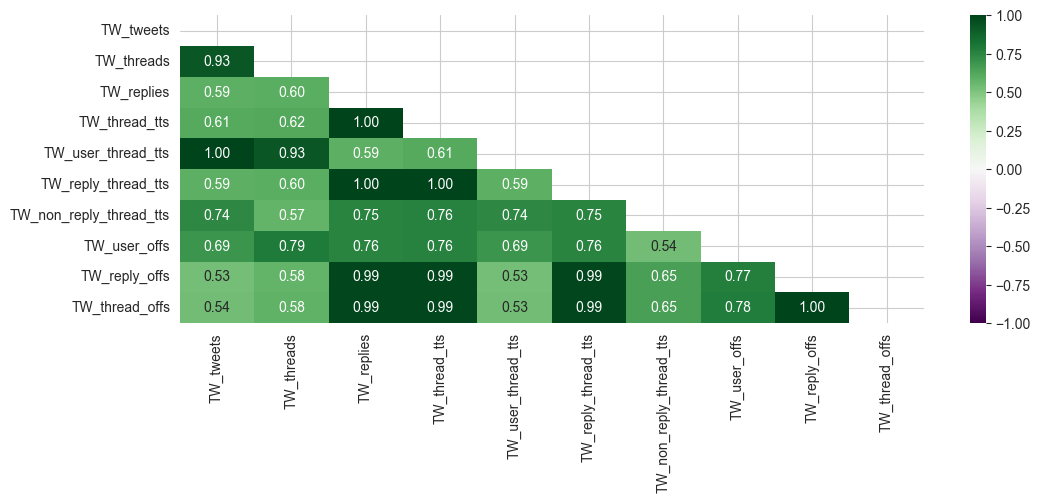

In [214]:
# Avaliando correlação entre os valores brutos
cols = [
    'TW_tweets', 'TW_threads', 'TW_replies', 'TW_thread_tts', 'TW_user_thread_tts', 'TW_reply_thread_tts', 'TW_non_reply_thread_tts', 'TW_user_offs', 'TW_reply_offs', 'TW_thread_offs'
]
_df = cand_df[cols]

plot_corr_heatmap(_df)

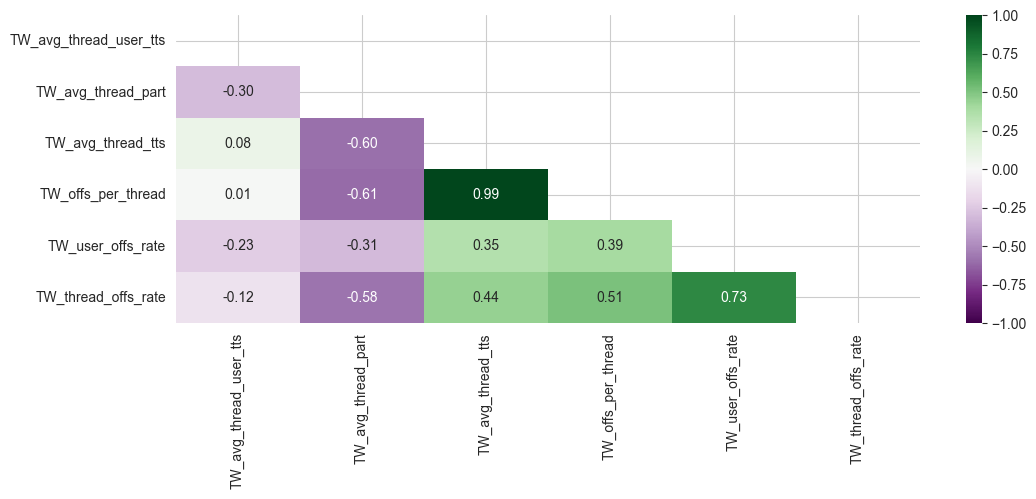

In [225]:
# Avaliando correlação entre as taxas
cols = [
    'TW_avg_thread_user_tts', 'TW_avg_thread_part', 'TW_avg_thread_tts', 'TW_offs_per_thread', 'TW_user_offs_rate', 'TW_thread_offs_rate', 
]
_df = cand_df[cols]

plot_corr_heatmap(_df)

Como esperado, encontramos correlações muito fortes entre a quantidade de tweets postados e a ocorrência de conteúdo ofensivo, tanto com relação a quantidade de threads abertas, quanto de tamanho das threads.

Mas que outras variáveis também podem estar correlacionadas com o conteúdo ofensivo?

# Analisando outras variáveis

In [236]:
cand_df.columns

Index(['SG_UF', 'DS_CARGO', 'SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'NR_PARTIDO',
       'SG_PARTIDO', 'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'TW_USER',
       'TW_followersCount', 'TW_friendsCount', 'TW_statusesCount',
       'TW_favouritesCount', 'TW_tweets', 'TW_threads', 'TW_replies',
       'TW_thread_tts', 'TW_user_thread_tts', 'TW_reply_thread_tts',
       'TW_non_reply_thread_tts', 'TW_avg_thread_user_tts',
       'TW_avg_thread_part', 'TW_avg_replies', 'TW_avg_thread_tts',
       'TW_user_offenses', 'TW_reply_offenses', 'TW_conversation_offenses',
       'TW_user_offense_rate', 'TW_reply_offense_rate',
       'TW_conversation_offense_rate', 'TW_user_offs', 'TW_reply_offs',
       'TW_thread_offs', 'TW_user_offs_rate', 'TW_reply_offs_rate',
       'TW_thread_offs_rate', 'TW_offs_per_thread'],
      dtype='object')

In [226]:
social_cols = ["DS_GENERO", "DS_COR_RACA", "DS_GRAU_INSTRUCAO"]

MASCULINO    0.702128
FEMININO     0.297872
Name: DS_GENERO, dtype: float64


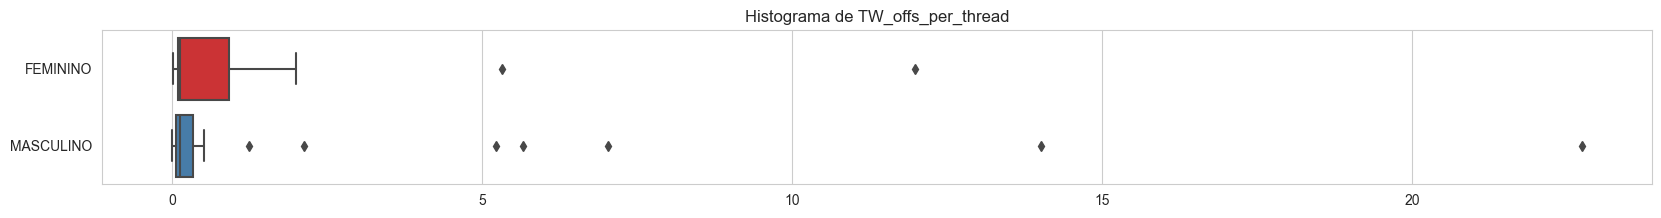

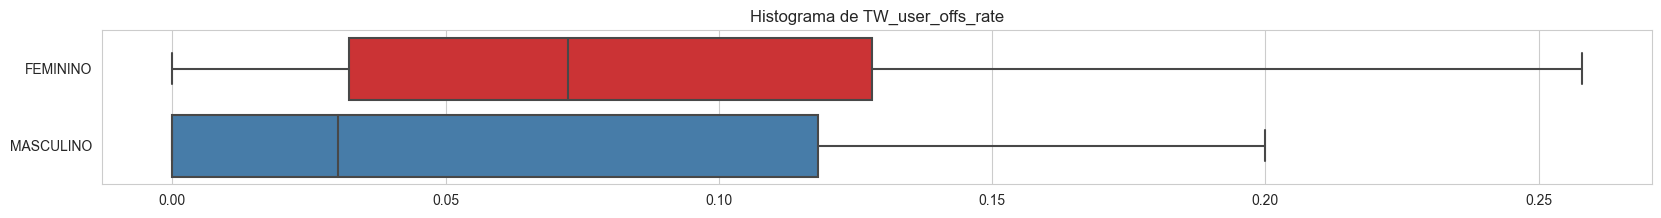

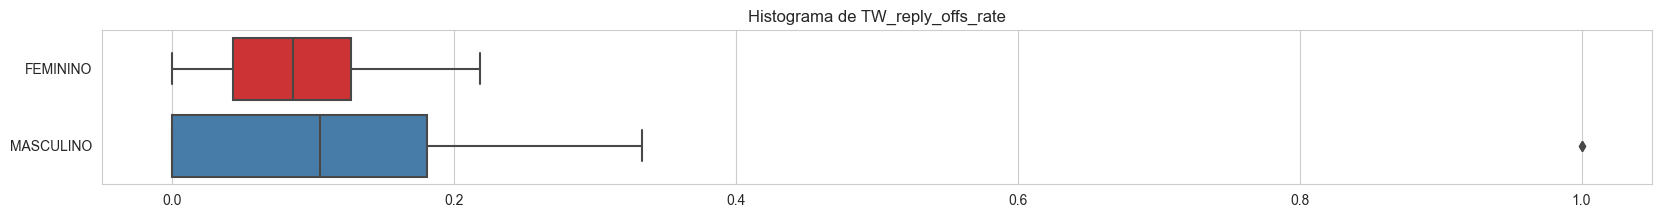

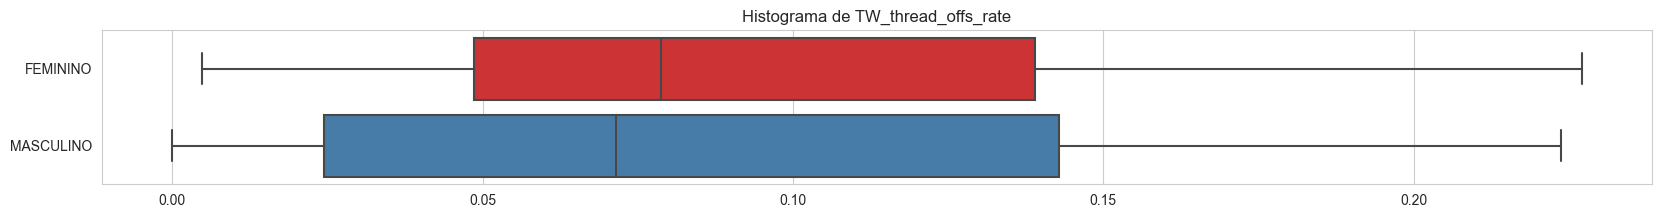

In [279]:
print(cand_df['DS_GENERO'].value_counts(normalize=True))

for i, col in enumerate(offense_prop_cols):
    plt.figure(figsize=(20, 2))
    p = sns.boxplot(
        data=cand_df[social_cols + offense_prop_cols],
        x=col,
        y='DS_GENERO',
        order=['FEMININO', 'MASCULINO'],
        palette='Set1',
    )
    p.set(title=f'Histograma de {col}')
    p.set(xlabel=None)
    p.set(ylabel=None)
    
    plt.show()

BRANCA      0.851064
PRETA       0.085106
PARDA       0.042553
INDÍGENA    0.021277
Name: DS_COR_RACA, dtype: float64


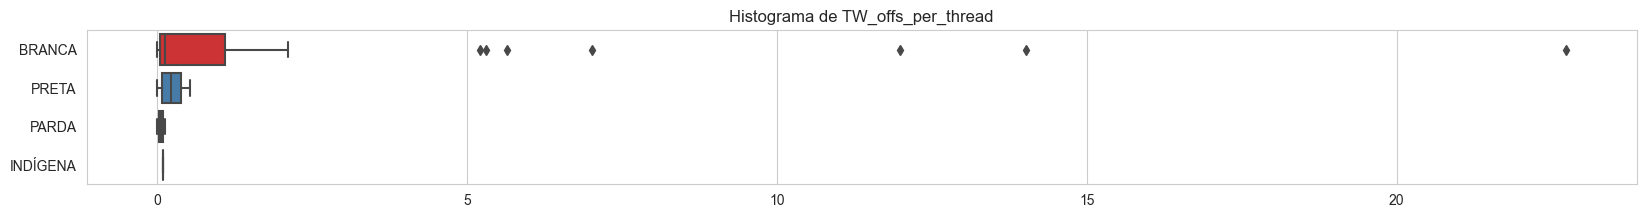

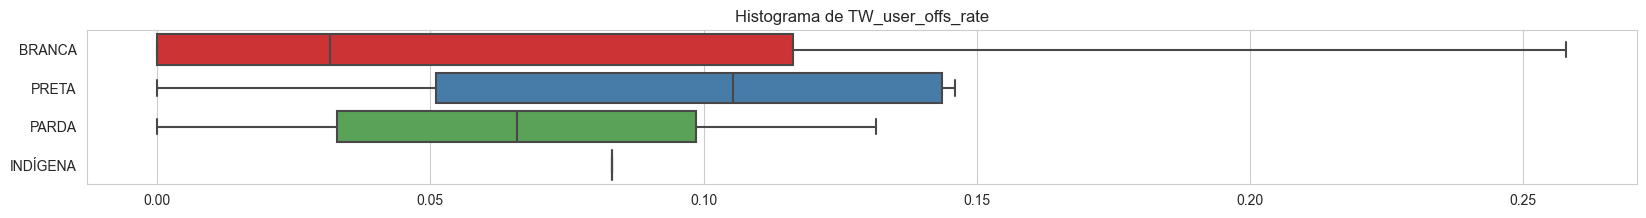

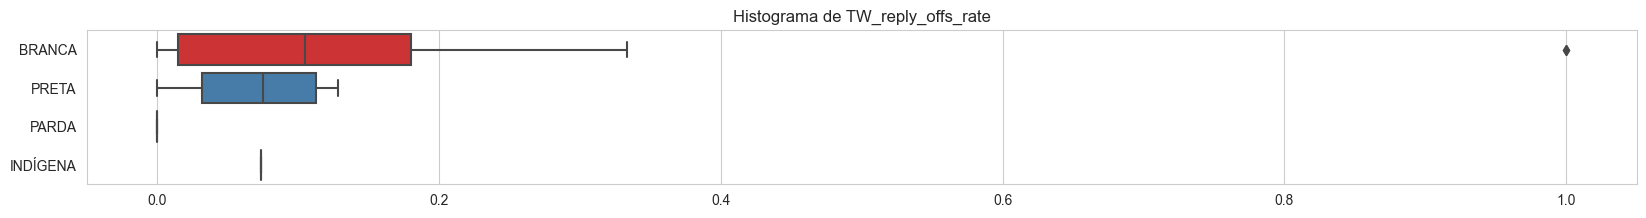

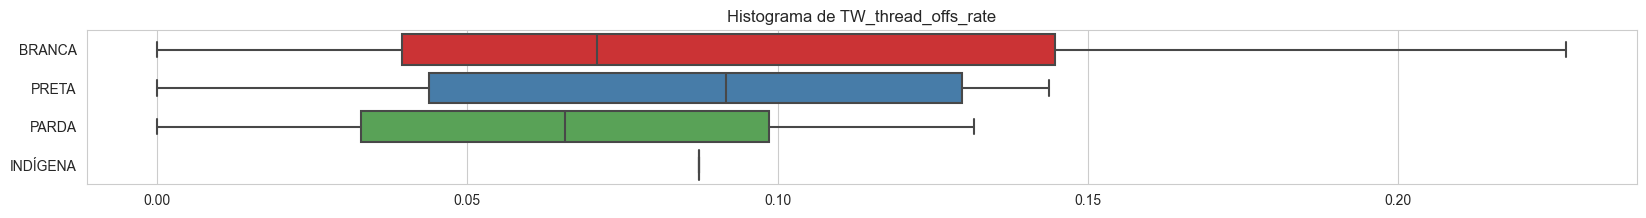

In [278]:
print(cand_df['DS_COR_RACA'].value_counts(normalize=True))

for i, col in enumerate(offense_prop_cols):
    plt.figure(figsize=(20, 2))
    p = sns.boxplot(
        data=cand_df[social_cols + offense_prop_cols],
        x=col,
        y='DS_COR_RACA',
        palette='Set1',
        order=['BRANCA', 'PRETA', 'PARDA', 'INDÍGENA'],
    )
    p.set(title=f'Histograma de {col}')
    p.set(xlabel=None)
    p.set(ylabel=None)
    
    plt.show()

SUPERIOR COMPLETO                0.936170
SUPERIOR INCOMPLETO              0.042553
ENSINO FUNDAMENTAL INCOMPLETO    0.021277
Name: DS_GRAU_INSTRUCAO, dtype: float64


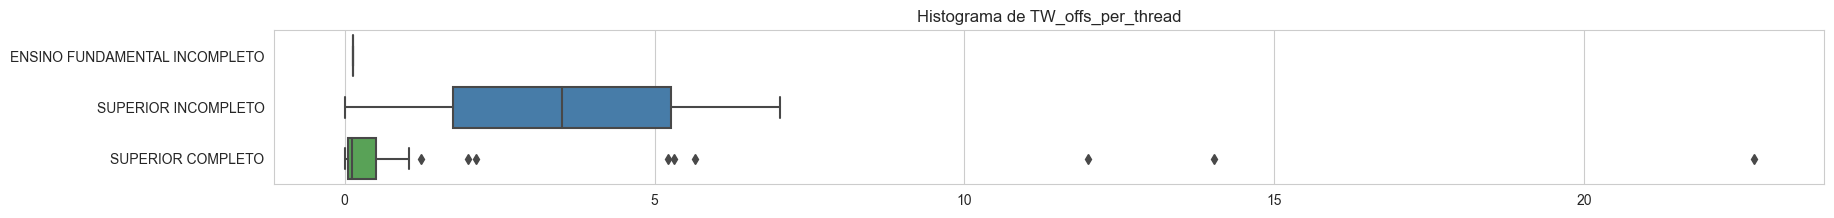

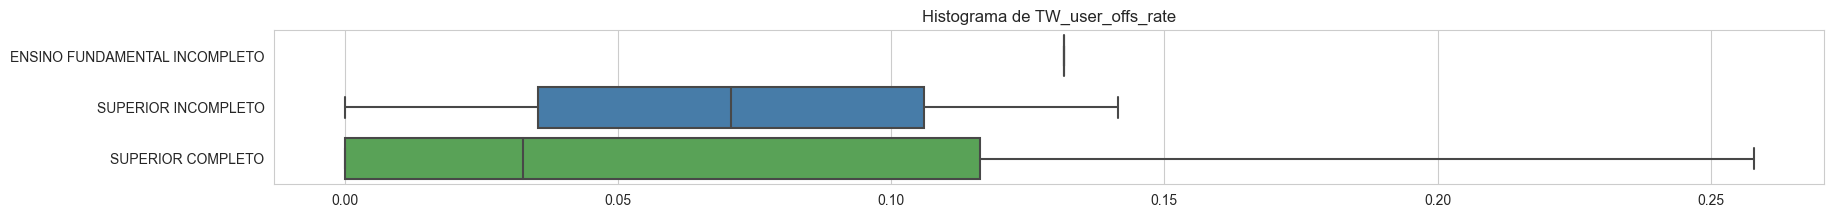

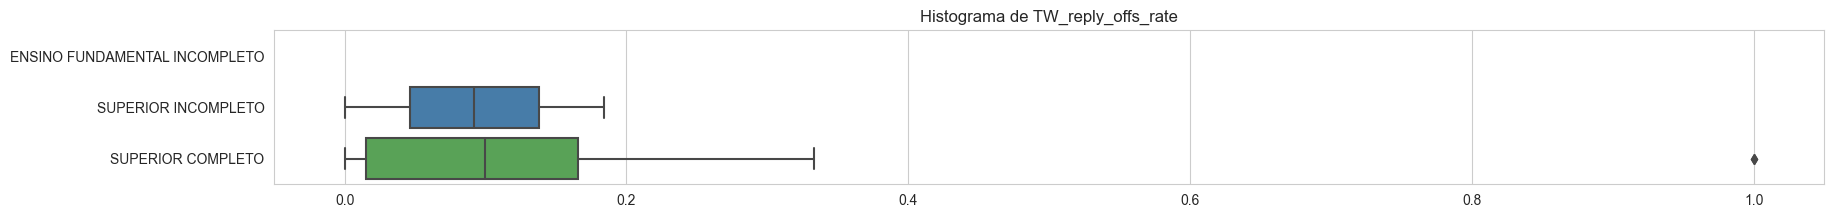

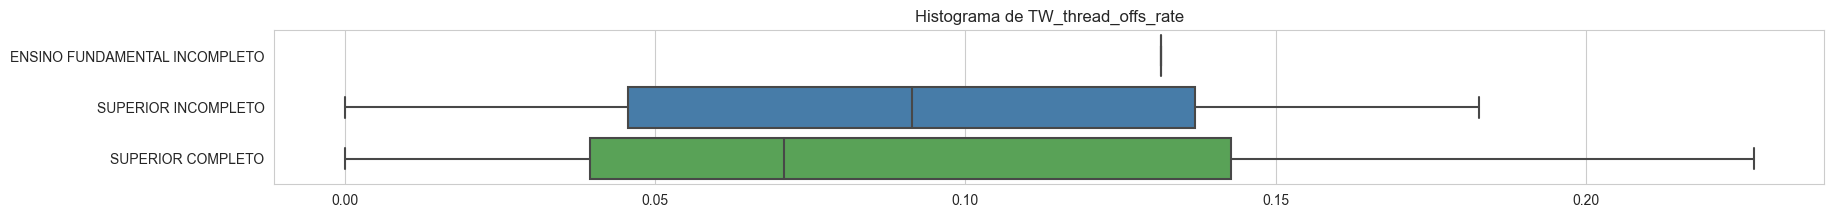

In [277]:
print(cand_df['DS_GRAU_INSTRUCAO'].value_counts(normalize=True))

for i, col in enumerate(offense_prop_cols):
    plt.figure(figsize=(20, 2))
    p = sns.boxplot(
        data=cand_df[social_cols + offense_prop_cols],
        x=col,
        y='DS_GRAU_INSTRUCAO',
        palette='Set1',
        order=['ENSINO FUNDAMENTAL INCOMPLETO', 'SUPERIOR INCOMPLETO', 'SUPERIOR COMPLETO'],
    )
    p.set(title=f'Histograma de {col}')
    p.set(xlabel=None)
    p.set(ylabel=None)
    
    plt.show()

In [269]:
# fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# sns.histplot(
#     cand_df,
#     x=cand_df['TW_user_offs_rate'], 
#     hue='DS_GENERO',
#     multiple='dodge',
#     hue_order=['FEMININO', 'MASCULINO'],
#     palette='Set1',
#     kde=True,
#     ax=ax[0],
# ).set(title='Taxa de ofensas postadas por Gênero')

# sns.violinplot(
#     data=cand_df,
#     x="DS_GENERO",
#     y="TW_user_offs_rate", 
#     cut=0,
#     order=['FEMININO', 'MASCULINO'],
#     palette='Set1',
#     ax=ax[1],
# )

In [270]:
# fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# sns.histplot(
#     cand_df,
#     x=cand_df['TW_thread_offs_rate'], 
#     hue='DS_GENERO',
#     multiple='layer',
#     hue_order=['FEMININO', 'MASCULINO'],
#     palette='Set1',
#     kde=True,
#     ax=ax[0],
# ).set(title='Taxa de ofensas em threads por Gênero')

# sns.violinplot(
#     data=cand_df,
#     x="DS_GENERO",
#     y="TW_thread_offs_rate", 
#     cut=0,
#     order=['FEMININO', 'MASCULINO'],
#     palette='Set1',
#     ax=ax[1],
# )